Text(0, 0.5, 'Left-handedness Rate')

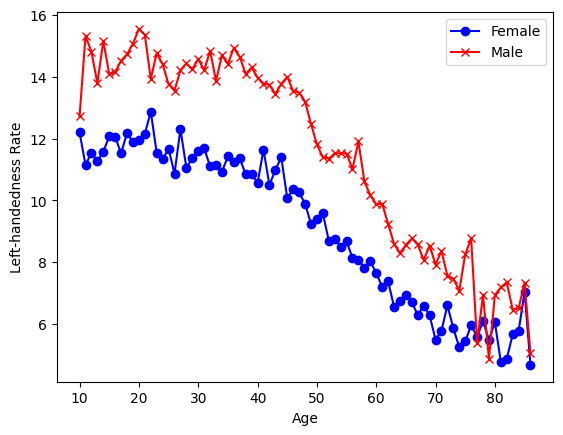

In [1]:
# task 1
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

fig, ax = plt.subplots()
ax.plot(lefthanded_data['Age'], lefthanded_data['Female'], 'b', marker='o', label='Female')
ax.plot(lefthanded_data['Age'], lefthanded_data['Male'], 'r', marker='x', label='Male')
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Left-handedness Rate")

    Age       Male     Female  Birth_year    Mean_lh
0    10  12.717558  12.198041        1976  12.457800
1    11  15.318830  11.144804        1975  13.231817
2    12  14.808281  11.549240        1974  13.178760
3    13  13.793744  11.276442        1973  12.535093
4    14  15.156304  11.572906        1972  13.364605
..  ...        ...        ...         ...        ...
72   82   7.350204   4.874899        1904   6.112551
73   83   6.471204   5.672536        1903   6.071870
74   84   6.510858   5.774881        1902   6.142870
75   85   7.337968   7.051459        1901   7.194713
76   86   5.059387   4.680948        1900   4.870168

[77 rows x 5 columns]


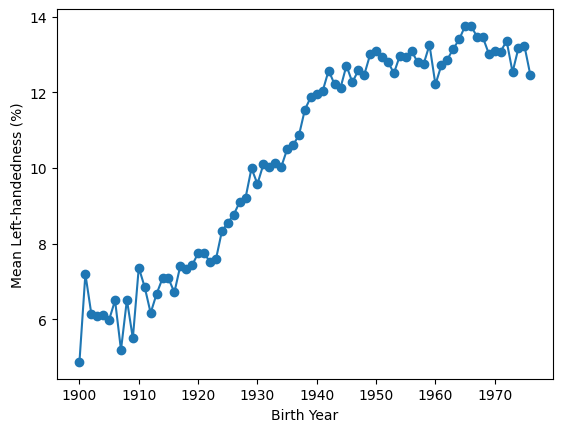

In [2]:
import pandas as pd

data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

lefthanded_data["Birth_year"] = 1986 - lefthanded_data["Age"]
lefthanded_data["Mean_lh"] = (lefthanded_data["Male"] + lefthanded_data["Female"]) / 2

print(lefthanded_data)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(lefthanded_data["Birth_year"], lefthanded_data["Mean_lh"], marker='o')
ax.set_xlabel("Birth Year")
ax.set_ylabel("Mean Left-handedness (%)")
plt.show()

Ages: [25, 45, 80, 90]
Probabilities of being left-handed: [0.13090615 0.13090615 0.06007159 0.06007159]


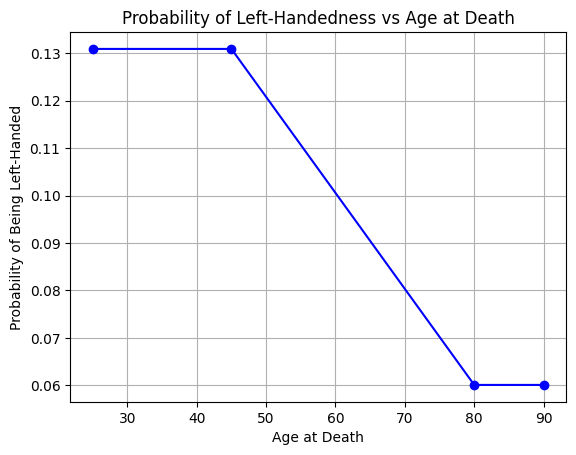

In [3]:
#Task 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

lefthanded_data["Birth_year"] = 1986 - lefthanded_data["Age"]
lefthanded_data["Mean_lh"] = (lefthanded_data["Male"] + lefthanded_data["Female"]) / 2


early_1900s_rate = lefthanded_data["Mean_lh"].iloc[-10:].mean()
late_1900s_rate = lefthanded_data["Mean_lh"].iloc[:10].mean()

def get_P_LH_given_A(ages_of_death):

    P_return = np.zeros(len(ages_of_death))

    for i, age in enumerate(ages_of_death):
        if age > 70:
            P_return[i] = early_1900s_rate / 100
        else:
            P_return[i] = late_1900s_rate / 100

    return P_return


ages = [25, 45, 80, 90]
probabilities = get_P_LH_given_A(ages)

print("Ages:", ages)
print("Probabilities of being left-handed:", probabilities)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(ages, probabilities, marker='o', linestyle='-', color='blue')  # points with lines connecting
ax.set_xlabel("Age at Death")
ax.set_ylabel("Probability of Being Left-Handed")
ax.set_title("Probability of Left-Handedness vs Age at Death")
ax.grid(True)  # add grid lines
plt.show()


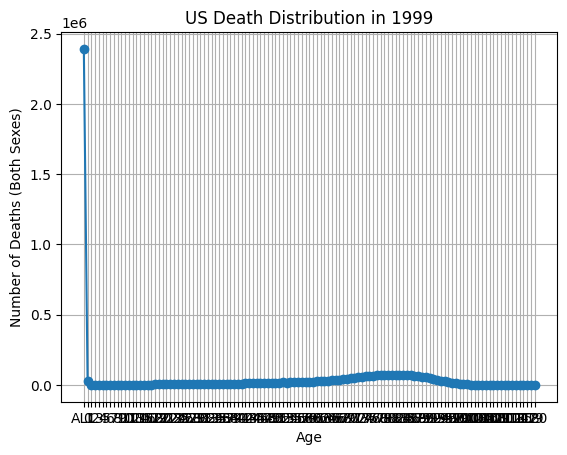

In [4]:
#Task 4
import matplotlib.pyplot as plt
import pandas as pd

data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

death_distribution_data = pd.read_csv(data_url_2, sep='\t')

death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])

fig, ax = plt.subplots()
ax.plot(death_distribution_data['Age'], death_distribution_data['Both Sexes'], data=death_distribution_data, marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Deaths (Both Sexes)')
plt.title('US Death Distribution in 1999')
plt.grid(True)
plt.show()

In [5]:
#Task 5

import pandas as pd
import numpy as np

death_distribution_url = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(death_distribution_url, sep="\t")

early_1900s_rate = 5
late_1900s_rate = 12

def get_P_LH_given_A(ages_of_death):
    P_return = np.zeros(len(ages_of_death))

    for i, age in enumerate(ages_of_death):
        if age > 70:
            P_return[i] = early_1900s_rate / 100
        else:
            P_return[i] = late_1900s_rate / 100

    return P_return

def P_lh():
    ages = death_distribution_data["Age"]
    ages = pd.to_numeric(ages, errors='coerce').fillna(0).astype(int)

    P_LH_given_A_values = get_P_LH_given_A(ages)

    num_dead = death_distribution_data["Both Sexes"]
    num_dead = pd.to_numeric(num_dead, errors='coerce').fillna(0)

    p_list = num_dead * P_LH_given_A_values

    p = p_list.sum()

    total_dead = num_dead.sum()

    p_total = p / total_dead

    return p_total

overall_left_handedness_probability = P_lh()
print("Overall probability of being left-handed:", overall_left_handedness_probability)

Overall probability of being left-handed: 0.09709573686413761


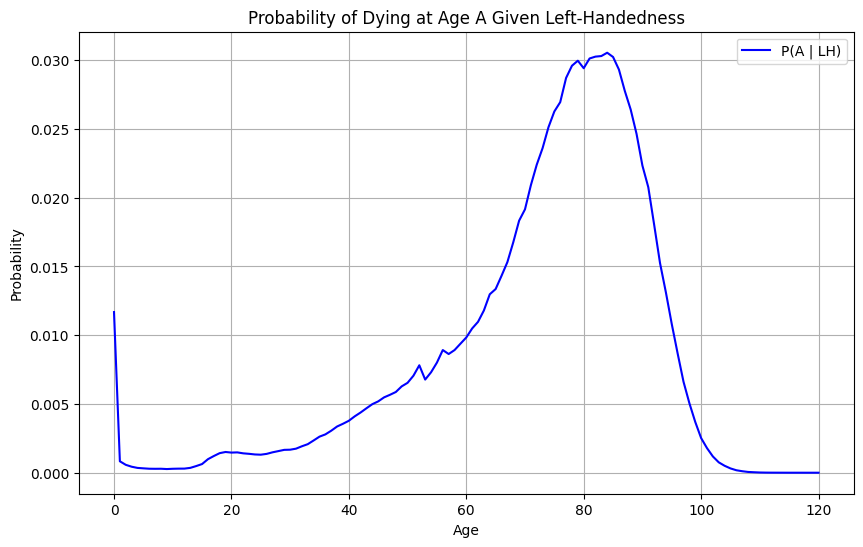

In [6]:
#Task 6

import pandas as pd
import matplotlib.pyplot as plt


data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])

death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])

def P_lh_given_A(age):
    return 0.1
def P_lh(death_distribution_data):
    death_distribution_data['P_LH_given_A'] = death_distribution_data['Age'].apply(P_lh_given_A)
    p_list = death_distribution_data['Both Sexes'] * death_distribution_data['P_LH_given_A']
    p = p_list.sum()
    total_deaths = death_distribution_data['Both Sexes'].sum()
    return p / total_deaths

def P_A_given_lh(death_distribution_data):
    total_deaths = death_distribution_data['Both Sexes'].sum()
    death_distribution_data['P_A'] = death_distribution_data['Both Sexes'] / total_deaths

    P_LH = P_lh(death_distribution_data)
    if 'P_LH_given_A' not in death_distribution_data.columns:
        death_distribution_data['P_LH_given_A'] = death_distribution_data['Age'].apply(P_lh_given_A)

    death_distribution_data['P_A_given_LH'] = (
        death_distribution_data['P_LH_given_A'] * death_distribution_data['P_A'] / P_LH
    )

    return death_distribution_data[['Age', 'P_A_given_LH']]

result = P_A_given_lh(death_distribution_data)

plt.figure(figsize=(10, 6))
plt.plot(result['Age'], result['P_A_given_LH'], label="P(A | LH)", color="blue")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Probability of Dying at Age A Given Left-Handedness")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#Task 7

import pandas as pd
import numpy as np

death_distribution_url = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(death_distribution_url, sep="\t")

early_1900s_rate = 5
late_1900s_rate = 12

def get_P_LH_given_A(ages_of_death):
    P_return = np.zeros(len(ages_of_death))

    for i, age in enumerate(ages_of_death):
        if age > 70:
            P_return[i] = early_1900s_rate / 100
        else:
            P_return[i] = late_1900s_rate / 100

    return P_return

def P_lh():
    ages = death_distribution_data["Age"]
    ages = pd.to_numeric(ages, errors='coerce').fillna(0).astype(int)

    P_LH_given_A_values = get_P_LH_given_A(ages)
    num_dead = death_distribution_data["Both Sexes"]
    num_dead = pd.to_numeric(num_dead, errors='coerce').fillna(0)

    p_list = num_dead * P_LH_given_A_values
    p = p_list.sum()
    total_dead = num_dead.sum()
    p_total = p / total_dead

    return p_total

def P_A_given_rh():

    ages = death_distribution_data["Age"]
    ages = pd.to_numeric(ages, errors='coerce').fillna(0).astype(int)

    num_dead = death_distribution_data["Both Sexes"]
    num_dead = pd.to_numeric(num_dead, errors='coerce').fillna(0)

    total_dead = num_dead.sum()
    P_A = num_dead / total_dead


    P_LH = P_lh()
    P_RH = 1 - P_LH
    P_LH_given_A = get_P_LH_given_A(ages)

    P_RH_given_A = 1 - P_LH_given_A

    P_A_given_RH = (P_RH_given_A * P_A) / P_RH

    return P_A_given_RH

P_A_given_RH_values = P_A_given_rh()
print("P(A | RH) values for each age:", P_A_given_RH_values)

print(f"P(A = 50 | RH) = {P_A_given_RH_values[age_index]}")


P(A | RH) values for each age: 0      4.873526e-01
1      5.693391e-03
2      4.053461e-04
3      2.804205e-04
4      2.131685e-04
           ...     
121    2.200048e-07
122    0.000000e+00
123    0.000000e+00
124    0.000000e+00
125    0.000000e+00
Name: Both Sexes, Length: 126, dtype: float64


NameError: name 'age_index' is not defined

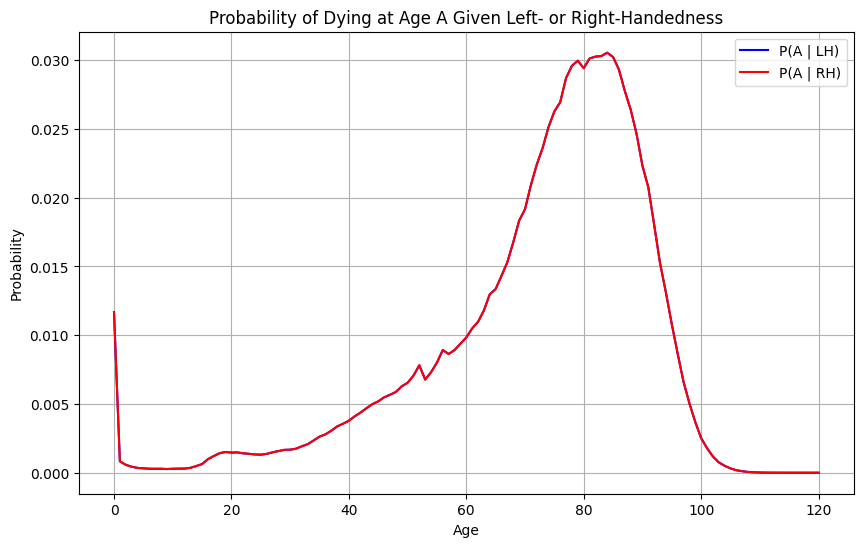

In [8]:
#Task 8

import pandas as pd
import matplotlib.pyplot as plt

data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])

death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])


def P_lh_given_A(age):
    return 0.1

def P_rh_given_A(age):

    return 0.9
def P_lh(death_distribution_data):
    death_distribution_data['P_LH_given_A'] = death_distribution_data['Age'].apply(P_lh_given_A)
    p_list = death_distribution_data['Both Sexes'] * death_distribution_data['P_LH_given_A']
    return p_list.sum() / death_distribution_data['Both Sexes'].sum()

def P_rh(death_distribution_data):
    death_distribution_data['P_RH_given_A'] = death_distribution_data['Age'].apply(P_rh_given_A)
    p_list = death_distribution_data['Both Sexes'] * death_distribution_data['P_RH_given_A']
    return p_list.sum() / death_distribution_data['Both Sexes'].sum()

def calculate_probabilities(death_distribution_data):
    total_deaths = death_distribution_data['Both Sexes'].sum()
    death_distribution_data['P_A'] = death_distribution_data['Both Sexes'] / total_deaths

    P_LH = P_lh(death_distribution_data)
    P_RH = P_rh(death_distribution_data)

    death_distribution_data['P_LH_given_A'] = death_distribution_data['Age'].apply(P_lh_given_A)
    death_distribution_data['P_RH_given_A'] = death_distribution_data['Age'].apply(P_rh_given_A)

    death_distribution_data['P_A_given_LH'] = (
        death_distribution_data['P_LH_given_A'] * death_distribution_data['P_A'] / P_LH
    )
    death_distribution_data['P_A_given_RH'] = (
        death_distribution_data['P_RH_given_A'] * death_distribution_data['P_A'] / P_RH
    )

    return death_distribution_data[['Age', 'P_A_given_LH', 'P_A_given_RH']]


result = calculate_probabilities(death_distribution_data)

plt.figure(figsize=(10, 6))
plt.plot(result['Age'], result['P_A_given_LH'], label="P(A | LH)", color="blue")
plt.plot(result['Age'], result['P_A_given_RH'], label="P(A | RH)", color="red")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Probability of Dying at Age A Given Left- or Right-Handedness")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
#Task 9

import pandas as pd
import numpy as np

death_distribution_url = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(death_distribution_url, sep="\t")

def get_P_LH_given_A(ages_of_death):
    early_1900s_rate = 5
    late_1900s_rate = 12

    P_return = np.zeros(len(ages_of_death))

    for i, age in enumerate(ages_of_death):
        if age > 70:
            P_return[i] = early_1900s_rate / 100
        else:
            P_return[i] = late_1900s_rate / 100

    return P_return

def calculate_average_age():
    ages = pd.to_numeric(death_distribution_data["Age"], errors='coerce').fillna(0).astype(int)


    P_LH_given_A_values = get_P_LH_given_A(ages)
    P_RH_given_A_values = 1 - P_LH_given_A_values

    num_dead = pd.to_numeric(death_distribution_data["Both Sexes"], errors='coerce').fillna(0)


    weighted_lh_ages = ages * P_LH_given_A_values
    average_lh_age = np.nansum(weighted_lh_ages) / np.nansum(P_LH_given_A_values)

    weighted_rh_ages = ages * P_RH_given_A_values
    average_rh_age = np.nansum(weighted_rh_ages) / np.nansum(P_RH_given_A_values)


    age_difference = average_lh_age - average_rh_age


    print(f"Average age at death for left-handed people: {round(average_lh_age, 2)}")
    print(f"Average age at death for right-handed people: {round(average_rh_age, 2)}")
    print(f"Difference between left-handed and right-handed death age: {round(age_difference, 2)}")


calculate_average_age()


Average age at death for left-handed people: 49.51
Average age at death for right-handed people: 62.69
Difference between left-handed and right-handed death age: -13.18


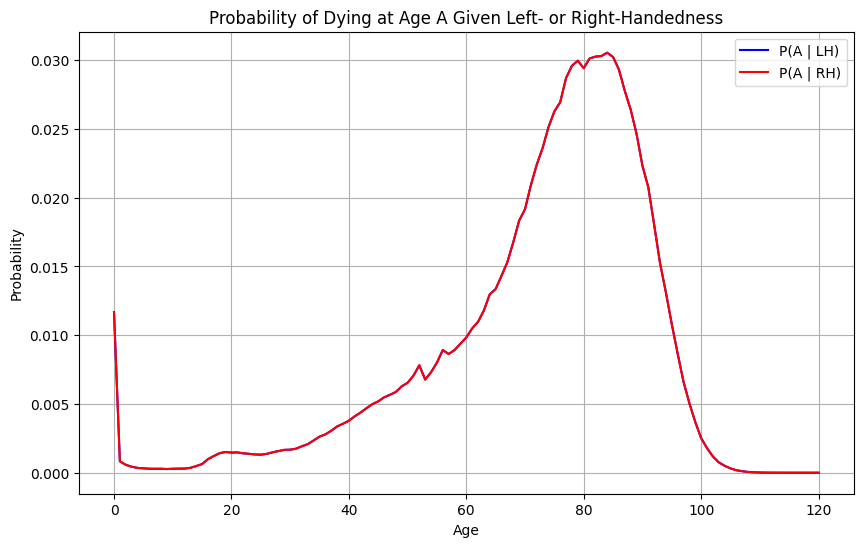

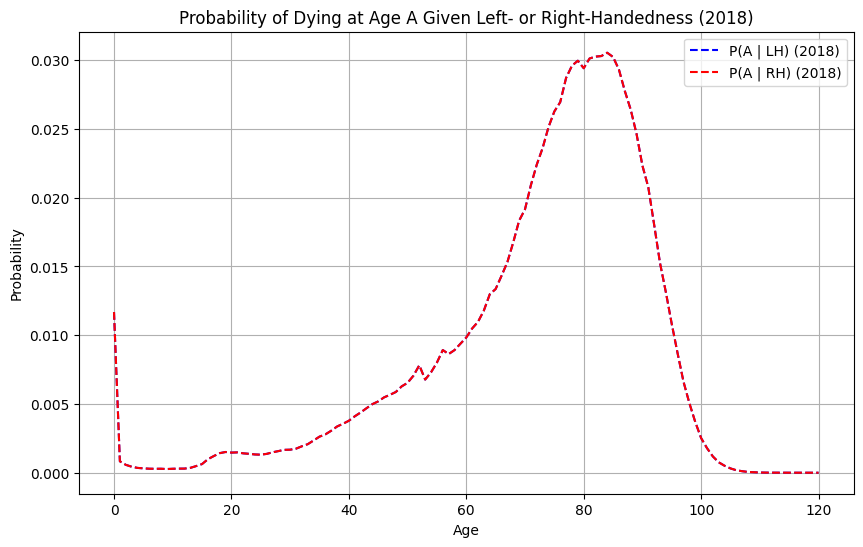

In [10]:
#Task 10

import pandas as pd
import matplotlib.pyplot as plt


data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])


death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])


def P_lh_given_A(age, study_year=2025):

    return 0.1

def P_rh_given_A(age, study_year=2025):

    return 0.9

def P_lh(death_distribution_data, study_year=2025):
    death_distribution_data['P_LH_given_A'] = death_distribution_data['Age'].apply(lambda age: P_lh_given_A(age, study_year))
    p_list = death_distribution_data['Both Sexes'] * death_distribution_data['P_LH_given_A']
    return p_list.sum() / death_distribution_data['Both Sexes'].sum()

def P_rh(death_distribution_data, study_year=2025):
    death_distribution_data['P_RH_given_A'] = death_distribution_data['Age'].apply(lambda age: P_rh_given_A(age, study_year))
    p_list = death_distribution_data['Both Sexes'] * death_distribution_data['P_RH_given_A']
    return p_list.sum() / death_distribution_data['Both Sexes'].sum()

def calculate_probabilities(death_distribution_data, study_year=2025):
    total_deaths = death_distribution_data['Both Sexes'].sum()
    death_distribution_data['P_A'] = death_distribution_data['Both Sexes'] / total_deaths

    P_LH = P_lh(death_distribution_data, study_year)
    P_RH = P_rh(death_distribution_data, study_year)

    death_distribution_data['P_LH_given_A'] = death_distribution_data['Age'].apply(lambda age: P_lh_given_A(age, study_year))
    death_distribution_data['P_RH_given_A'] = death_distribution_data['Age'].apply(lambda age: P_rh_given_A(age, study_year))

    death_distribution_data['P_A_given_LH'] = (
        death_distribution_data['P_LH_given_A'] * death_distribution_data['P_A'] / P_LH
    )
    death_distribution_data['P_A_given_RH'] = (
        death_distribution_data['P_RH_given_A'] * death_distribution_data['P_A'] / P_RH
    )

    return death_distribution_data[['Age', 'P_A_given_LH', 'P_A_given_RH']]


result = calculate_probabilities(death_distribution_data)

plt.figure(figsize=(10, 6))
plt.plot(result['Age'], result['P_A_given_LH'], label="P(A | LH)", color="blue")
plt.plot(result['Age'], result['P_A_given_RH'], label="P(A | RH)", color="red")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Probability of Dying at Age A Given Left- or Right-Handedness")
plt.legend()
plt.grid(True)
plt.show()


result_2018 = calculate_probabilities(death_distribution_data, study_year=2018)

plt.figure(figsize=(10, 6))
plt.plot(result_2018['Age'], result_2018['P_A_given_LH'], label="P(A | LH) (2018)", color="blue", linestyle="--")
plt.plot(result_2018['Age'], result_2018['P_A_given_RH'], label="P(A | RH) (2018)", color="red", linestyle="--")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Probability of Dying at Age A Given Left- or Right-Handedness (2018)")
plt.legend()
plt.grid(True)
plt.show()